In [184]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor

In [254]:
raw_data = pd.read_csv("HealthExpend.csv")

In [256]:
raw_data.EXPENDIP

0           0.00
1           0.00
2       16121.45
3           0.00
4           0.00
          ...   
1995        0.00
1996        0.00
1997       53.32
1998        0.00
1999        0.00
Name: EXPENDIP, Length: 2000, dtype: float64

In [146]:
raw_data.isnull().sum()

AGE              0
ANYLIMIT         0
COLLEGE          0
HIGHSCH          0
GENDER           0
MNHPOOR          0
insure           0
USC              0
UNEMPLOY         0
MANAGEDCARE      0
famsize          0
COUNTIP          0
EXPENDIP         0
COUNTOP          0
EXPENDOP         0
RACE             0
RACE1            0
REGION           0
REGION1          0
EDUC             0
EDUC1            0
MARISTAT         0
MARISTAT1        0
INCOME           0
INCOME1          0
PHSTAT           0
PHSTAT1          0
INDUSCLASS     888
dtype: int64

In [147]:
data = raw_data[["AGE", "famsize", "COUNTIP", "COUNTOP", "EXPENDIP","EXPENDOP"]]

In [327]:
X = data[["AGE", "famsize", "COUNTIP", "COUNTOP", "EXPENDIP"]]
Y = data["EXPENDOP"]

In [328]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, 
    test_size = 0.2, 
    random_state = 42
)

In [329]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [350]:
ols_model_odd = sm.OLS(y_train, x_train)

In [343]:
y_odd_pred_train = ols_model_odd.predict(x_train)
y_odd_pred_test = ols_model_odd.predict(x_test)

In [348]:
print(ols_model_odd.summary())

AttributeError: 'OLS' object has no attribute 'summary'

In [154]:
metrics.r2_score(y_test, y_pred_test)

0.3752467787096645

<Axes: >

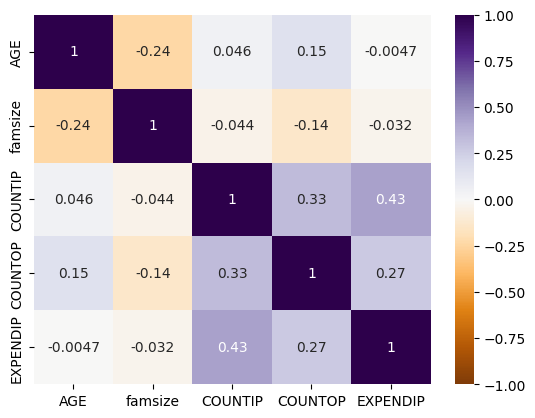

In [155]:
sns.heatmap(X.corr(), annot=True, vmin = -1, vmax = 1, cmap = "PuOr")

In [156]:
# https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [157]:
print(vif_data)

   features       VIF
0       AGE  3.148680
1   famsize  2.797012
2   COUNTIP  1.389046
3   COUNTOP  1.430247
4  EXPENDIP  1.263164


In [158]:
np.var(y_pred_train)

5688736.4712998485

In [159]:
np.var(y_pred_test)

4418909.933701985

In [160]:
residuals = pd.DataFrame()

In [161]:
y_real = pd.concat([y_train, y_test], axis = 0)

In [162]:
np.var(y_real)

10839989.984266596

In [163]:
type(y_real)

pandas.core.series.Series

In [164]:
y_real.sort_index()

0           0.00
1        2384.56
2       29729.56
3         110.00
4        3298.95
          ...   
1995        0.00
1996        0.00
1997      100.76
1998      798.59
1999        0.00
Name: EXPENDOP, Length: 2000, dtype: float64

In [165]:
Y_dataframe = pd.DataFrame(y_real.sort_index())

In [166]:
y_pred = pd.concat([y_pred_train, y_pred_test], axis = 0)

In [167]:
Y_data = {
    "Y_real" : y_real.sort_index(),
    "Y_pred" : y_pred.sort_index()
}

In [168]:
Y_dataframe = pd.DataFrame(Y_data)

In [169]:
Y_dataframe

,Y_real,Y_pred
0,0.00,12.157688
1,2384.56,1481.855986
2,29729.56,9460.008480
3,110.00,1096.989001
4,3298.95,7671.513356
...,...,...
1995,0.00,359.083715
1996,0.00,-167.602040
1997,100.76,1310.506865
1998,798.59,2704.123818


In [170]:
Y_dataframe["Error"] = Y_dataframe["Y_real"] - Y_dataframe["Y_pred"]

In [171]:
Y_dataframe

,Y_real,Y_pred,Error
0,0.00,12.157688,-12.157688
1,2384.56,1481.855986,902.704014
2,29729.56,9460.008480,20269.551520
3,110.00,1096.989001,-986.989001
4,3298.95,7671.513356,-4372.563356
...,...,...,...
1995,0.00,359.083715,-359.083715
1996,0.00,-167.602040,167.602040
1997,100.76,1310.506865,-1209.746865
1998,798.59,2704.123818,-1905.533818


In [172]:
np.var(Y_dataframe["Error"])

5834610.093032993

In [173]:
metrics.mean_squared_error(y_pred_test, y_test)

3769074.4565174244

In [174]:
metrics.mean_squared_error(y_pred_train, y_train)

6351474.961745131

D:\machineLearning\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


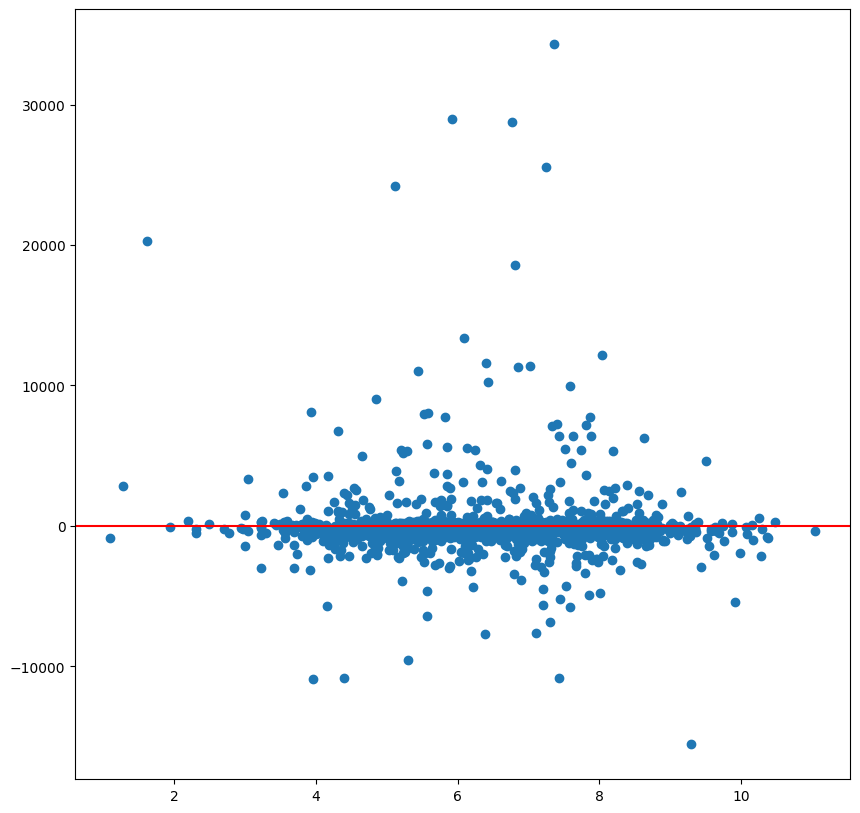

In [175]:
fig, ax = plt.subplots(figsize=(10,10))

ax.axhline(y = 0, color = "r")
ax.scatter(np.log(y_real), Y_dataframe["Error"])

In [176]:
lambdas = np.arange(0,1.01,0.01)
lambdas

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [177]:
r2_values = []
MSE = []

for l in lambdas: 
    ridge_model = sm.OLS(y_train, x_train).fit_regularized(alpha=l, L1_wt=0)
    y_pred_train = ridge_model.predict(x_train)
    
    r2_values.append (
        metrics.r2_score(y_train, y_pred_train)
    )
    
    MSE.append (
        metrics.mean_squared_error(y_train, y_pred_train)
    )

coeficients = {
    "Lambda" : lambdas,
    "R2_score": r2_values,
    "MSE" : MSE
}

coef_frame = pd.DataFrame(coeficients)

In [178]:
print(coef_frame)

     Lambda  R2_score           MSE
0      0.00  0.472478  6.351475e+06
1      0.01  0.472387  6.352568e+06
2      0.02  0.472183  6.355022e+06
3      0.03  0.471926  6.358117e+06
4      0.04  0.471646  6.361494e+06
..      ...       ...           ...
96     0.96  0.463601  6.458352e+06
97     0.97  0.463580  6.458608e+06
98     0.98  0.463559  6.458861e+06
99     0.99  0.463539  6.459109e+06
100    1.00  0.463518  6.459353e+06

[101 rows x 3 columns]


In [179]:
r2_values

[0.4724781207485109,
 0.47238732139133943,
 0.4721834931112482,
 0.47192648917262836,
 0.47164598198846,
 0.4713576812435314,
 0.4710702462579546,
 0.47078853185640956,
 0.47051523470534784,
 0.4702517816556274,
 0.46999883352584104,
 0.46975658240323537,
 0.4695249327085843,
 0.4693036141939021,
 0.4690922537486215,
 0.4688904215899027,
 0.4686976611625907,
 0.468513508490056,
 0.4683375045957149,
 0.4681692033242463,
 0.468008176086951,
 0.4678540145435165,
 0.4677063319003312,
 0.46756476328667285,
 0.46742896552389923,
 0.4672986165039277,
 0.46717341432579207,
 0.4670530762925621,
 0.46693733783867275,
 0.4668259514352312,
 0.46671868550514495,
 0.46661532336889644,
 0.4665156622340676,
 0.46641951223632405,
 0.4663266955358182,
 0.466237045470395,
 0.46615040576522904,
 0.4660666297973688,
 0.46598557991292255,
 0.46590712679417867,
 0.4658311488737147,
 0.4657575317924727,
 0.4656861678987687,
 0.4656169557852998,
 0.46554979986131906,
 0.465484609957296,
 0.4654213009595466,
 0

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [258]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [309]:
poly_features = PolynomialFeatures(degree=3)

In [310]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [311]:
X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

In [312]:
X_train_poly

array([[1.00000000e+00, 5.50000000e+01, 4.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.50000000e+01, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 3.10000000e+01, 3.00000000e+00, ...,
        2.88154260e+05, 1.13899695e+08, 4.50215121e+10],
       [1.00000000e+00, 1.80000000e+01, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 5.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [313]:
ols_model = sm.OLS(Y_train, X_train_poly).fit()

In [314]:
Y_pred = ols_model.predict(X_test_poly)

In [315]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               EXPENDOP   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     106.3
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:56:10   Log-Likelihood:                -14390.
No. Observations:                1600   AIC:                         2.885e+04
Df Residuals:                    1567   BIC:                         2.902e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4320      0.367      1.176      0.2

In [316]:
metrics.mean_squared_error(Y_test, Y_pred)

98436336.46560962

In [337]:
X_new = X.drop(['famsize', 'EXPENDIP'], axis = 1)

In [338]:
x_new_train, x_new_test, y_train, y_test = train_test_split(
    X_new, Y, 
    test_size = 0.2, 
    random_state = 42
)

In [339]:
x_new_train = sm.add_constant(x_new_train)
x_new_test = sm.add_constant(x_new_test)

In [351]:
ols_model_new = sm.OLS(y_train, x_new_train)

In [341]:
y_new_pred_train = ols_model_new.predict(x_new_train)
y_new_pred_test = ols_model_new.predict(x_new_test)

In [342]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               EXPENDOP   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     475.1
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          1.50e-220
Time:                        19:13:19   Log-Likelihood:                -14803.
No. Observations:                1600   AIC:                         2.961e+04
Df Residuals:                    1596   BIC:                         2.964e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -718.4564    198.821     -3.614      0.0

In [345]:
import timeit

In [367]:
time_model_odd = timeit.timeit(lambda: ols_model_odd.fit(), number=10000)

In [368]:
time_model_new = timeit.timeit(lambda: ols_model_new.fit(), number=10000)

In [369]:
print("Час для старої моделі:", time_model_odd)

Час для старої моделі: 0.29802580003160983


In [370]:
print("Час для нової моделі:", time_model_new)

Час для нової моделі: 0.06616019998909906


In [373]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state=42)

In [410]:
polynomial = PolynomialFeatures(degree=3)

X_train_poly = polynomial.fit_transform(X_train)
X_test_poly = polynomial.transform(X_test)

X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

nonlinear_model = sm.OLS(Y_train, X_train_poly).fit()

print(nonlinear_model.summary())

                            OLS Regression Results                            
Dep. Variable:               EXPENDOP   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     114.4
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          5.26e-280
Time:                        19:34:07   Log-Likelihood:                -14621.
No. Observations:                1600   AIC:                         2.928e+04
Df Residuals:                    1580   BIC:                         2.939e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        140.6540   1625.190      0.087      0.9

In [411]:
X_train_poly

array([[  1.,  55.,   0., ...,   0.,   0.,  64.],
       [  1.,  55.,   0., ...,   0.,   0.,  27.],
       [  1.,  40.,   0., ...,   0.,   0.,   1.],
       ...,
       [  1.,  31.,   1., ...,   9.,  81., 729.],
       [  1.,  18.,   0., ...,   0.,   0.,   0.],
       [  1.,  56.,   0., ...,   0.,   0.,  27.]])

In [412]:
type(X_train_poly)

numpy.ndarray

In [413]:
X_df = pd.DataFrame(X_train_poly)

In [414]:
X_df.columns

RangeIndex(start=0, stop=20, step=1)

In [415]:
X_df = X_df.drop([1, 2, 4, 6, 8, 10, 16], axis=1)

In [416]:
X_train_poly = X_df.to_numpy()

In [417]:
X_train_poly

array([[  1.,   4.,   0., ...,   0.,   0.,  64.],
       [  1.,   3.,   0., ...,   0.,   0.,  27.],
       [  1.,   1.,   0., ...,   0.,   0.,   1.],
       ...,
       [  1.,   9.,  31., ...,   9.,  81., 729.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   3.,   0., ...,   0.,   0.,  27.]])

In [418]:
nonlinear_model = sm.OLS(Y_train, X_train_poly).fit()

In [419]:
print(nonlinear_model.summary())

                            OLS Regression Results                            
Dep. Variable:               EXPENDOP   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     178.8
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          2.87e-284
Time:                        19:34:11   Log-Likelihood:                -14629.
No. Observations:                1600   AIC:                         2.928e+04
Df Residuals:                    1587   BIC:                         2.935e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.9579     73.544      1.114      0.2